<h2>Poikkeavien arvojen poistaminen</h2>

Muista selvästi poikkeavat arvot voivat olla virheellisiä tai todellisia.

Jos poikkeavat arvot osoittautuvat virheellisiksi, niin ne on syytä poistaa datasta. Kyseeseen voi tulla poikkeavia arvoja sisältävien rivien poisto, poikkeavien arvojen korvaaminen puuttuvan arvon merkillä tai korvaaminen esimerkiksi mediaanilla.

Vaikka poikkeavat arvot olisivat todellisia, niin niiden poistaminen voi olla aiheellista esimerkiksi ennustemallien rakentamisessa.

Poikkeavien arvojen kriteerinä voidaa pitää esimerkiksi seuraavia:
<ul>
    <li>Arvot, jotka ovat yli kolmen keskihajonnan päässä keskiarvostaan.</li> 
<li>Arvot, jotka ovat yli 1,5 neljännesvälin päässä neljänneksestä. Neljännesväli (inter quartile range) on yläneljänneksen ja alaneljänneksen erotus. Ruutu- ja janakaavioon (boxplot) yli 1,5 neljännesvälin päässä olevat arvot merkitään oletusarvoisesti erillisinä pisteinä.</li></ul>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

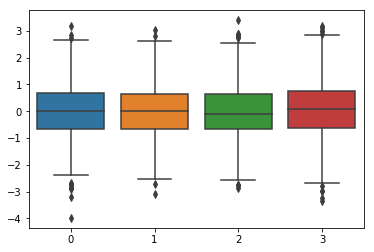

In [2]:
# Arvotaan normaalijakaumasta satunnaislukuja
df = pd.DataFrame(np.random.randn(1000,4))
sns.boxplot(data = df)

<h2>Rivien poisto</h2>

In [3]:
# Poistan poikkeavia arvoja (yli 3 keskihajonnan päässä keskiarvostaan) sisältävät rivit
df1 = df
for var in df1:
    df1 = df1[np.abs(df1[var] - df1[var].mean()) <= 3 * df1[var].std()]

# Tarkistan jäljelle jääneiden rivien lukumäärän
df1.shape

(991, 4)

In [4]:
# Poistan poikkeavia arvoja (yli 1,5 neljännesväliä neljänneksestä)
df2 = df
for var in df2:
    Q1 = df2[var].quantile(0.25) # alaneljännes
    Q3 = df2[var].quantile(0.75) # yläneljännes
    IQR = Q3 - Q1
    df2 = df2[((df2[var] >= (Q1 - 1.5 * IQR)) & (df2[var] <= (Q3 + 1.5 * IQR)))]

# Tarkistan jäljelle jääneiden rivien lukumäärän    
df2.shape

(966, 4)

<h2>Korvaaminen puuttuvalla arvolla</h2>

<b>mask()</b> on tässä kätevä
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mask.html

In [5]:
df3 = df
df3 = df3.mask(((df3 - df3.mean())/df3.std()).abs() > 3)

# Tällä saisin saman lopputuloksen (sub = vähennyslasku, div = jakolasku, gt = greater than)
#df3 = df3.mask(df3.sub(df3.mean()).div(df3.std()).abs().gt(3))

# Tarkistan muuttujilee jääneiden arvojen lukumäärät (loput korvattu puuttuvan arvon merkillä)
df3.count()

0    997
1    998
2    999
3    997
dtype: int64

In [6]:
df4 = df
df4 = df4.mask((((df4 - df4.quantile(0.75)) / (df4.quantile(0.75) - df4.quantile(0.25))) > 1.5) | 
               (((df4.quantile(0.25) - df4) / (df4.quantile(0.75) - df4.quantile(0.25))) > 1.5))

# Tarkistan muuttujilee jääneiden arvojen lukumäärät (loput korvattu puuttuvan arvon merkillä)
df4.count()

0    989
1    996
2    990
3    990
dtype: int64

<h2>Korvaaminen toisella arvolla</h2>

In [7]:
# Korvaan poikkeavat arvot keskiarvolla
df5 = df
df5 = df5.mask(((df5 - df5.mean())/df5.std()).abs() > 3, other = df5.mean(), axis = 1)

In [8]:
# Korvaan kaikki arvot, jotka ovat itseisarvoltaan yli 3, arvolla 3 tai -3
df6 = df
df6[df6.abs() > 2] = np.sign(df6) * 2

df6

,0,1,2,3
0,-0.109810,-1.307717,0.135756,-1.038316
1,1.507977,1.059024,-1.309905,0.352166
2,0.789675,-0.170668,-1.689123,-0.408135
3,0.714605,-1.430674,0.916205,1.053693
4,-1.250175,-1.708328,1.514119,-0.604062
5,-1.124924,2.000000,1.678253,0.516327
6,1.295524,0.183218,0.482528,1.063486
7,0.464107,-1.182419,-0.057489,0.020834
8,0.561115,-1.316093,-0.294701,-0.646938
9,-2.000000,0.274696,-0.238571,-1.675063
